# Hacer funcionar el MCM de METROPOLIS

In [111]:
import matplotlib.pyplot as plt
import numpy as np

In [112]:
#programa ligeramente inspirado en el hecho por Tiago Ramalho 2014
#disclaimer: siguiendo los pasos parece estar bien,
# pero mi poca experiencia no me permite ver si esta bien o no

np.random.seed(10)



#valores de clase
sigma1=1
sigma2=0.01
m=0.3
b=0.1

#funcion bivariante gaussiana para el punto a analizar
def f(x, y):
    g = mlab.bivariate_normal(x, y, sigma1, sigma2, m, b, 0)
 
    return g*np.random.normal()+np.random.normal()

In [113]:
np.random.seed(10)

Nsamples = 10000
Nchains = 10
r = np.zeros(2) #inicio arreglo de datos
p = f(r[0], r[1]) #punto a analizar

chains = []
print p

0.715278974398


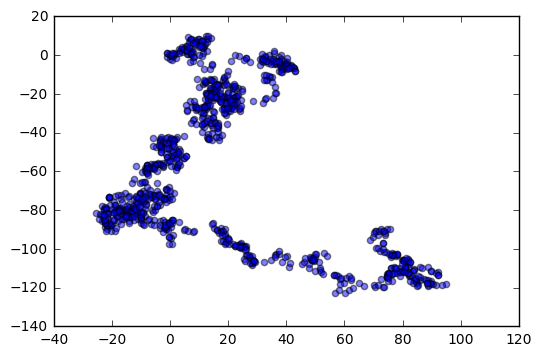

In [114]:

for i in range(Nsamples):
    rn = r + np.random.normal(size=2)
    pn = f(rn[0], rn[1])
    if pn >= p: #if the likelihood is higher, accept the sample and save it new-->old         
        p = pn
        r = rn
    else:
        u = np.random.rand() #if not, draw a new random number
        if u < pn/p: #accept if is higher, otherwise start again
            p = pn
            r = rn
    if i % Nchains == 0:
        chains.append(r)
 
chains = np.array(chains)
plt.scatter(chains[:, 0], chains[:, 1], alpha=0.5)
plt.show()